Training Set Results:
Training Accuracy: 0.882
Training Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       500
           1       0.90      0.86      0.88       500

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



Results for synthetic_data_100.csv:
Test Accuracy: 0.5
Test Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.62      0.57        53
           1       0.46      0.36      0.40        47

    accuracy                           0.50       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.49      0.50      0.49       100



Results for synthetic_data_200.csv:
Test Accuracy: 0.5
Test Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.67      0.5

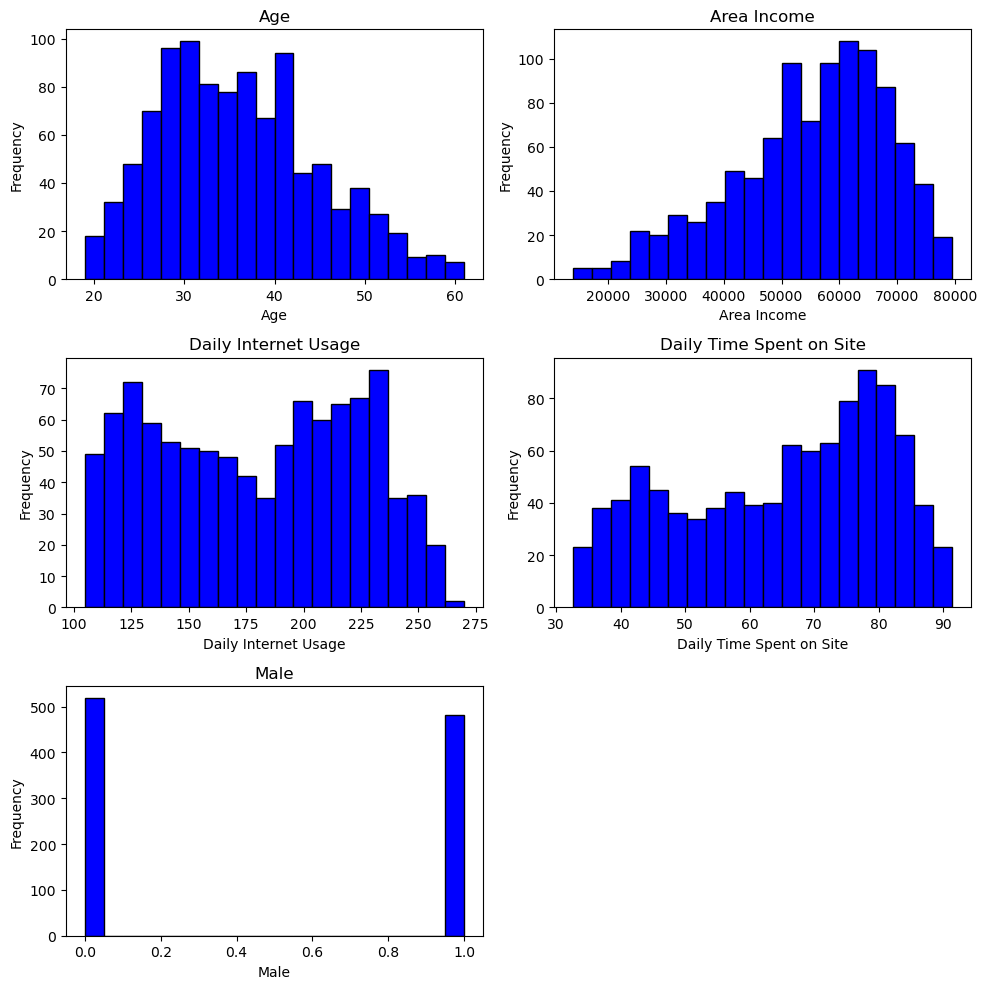

In [15]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Load the training data
train_df = pd.read_csv('trainsetn.csv')
train_df.drop(['City', 'Country', 'Timestamp', 'Ad Topic Line'], axis=1, inplace=True)

X_train = train_df[['Age', 'Area Income', 'Daily Internet Usage']]
y_train = train_df['Clicked on Ad']

#train
model = LogisticRegression()
model.fit(X_train, y_train)

#predicition
y_train_pred = model.predict(X_train)

#using accuract score 
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

print("Training Set Results:")
print(f"Training Accuracy: {train_accuracy}")
print("Training Classification Report:")
print(train_report)
print("\n")

# made a function using test model to be applied on 3 different database
def fun_test(test_path):
    test_df = pd.read_csv(test_path)
    
    X_test = test_df[['Age', 'Area Income', 'Daily Internet Usage']]
    y_test = test_df['Clicked on Ad']

    y_test_pred = model.predict(X_test)
    
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred)
    
    print(f"Results for {test_path}:")
    print(f"Test Accuracy: {test_accuracy}")
    print("Test Classification Report:")
    print(test_report)
    print("\n")

#main
fun_test('synthetic_data_100.csv')
fun_test('synthetic_data_200.csv')
fun_test('synthetic_data_500.csv')

import pandas as pd
import matplotlib.pyplot as plt


#plotting graph
columns_to_plot = ['Age', 'Area Income', 'Daily Internet Usage', 'Daily Time Spent on Site', 'Male']


plt.figure(figsize=(10, 10))


for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns, position i
    plt.hist(train_df[column], bins=20, color='blue', edgecolor='black')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()



Random Forest Cross-Validation Accuracy: 0.9200000000000002
Training Set Results:
Training Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



Results for synthetic_data_100.csv:
Test Accuracy: 0.56
Test Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        53
           1       0.54      0.47      0.50        47

    accuracy                           0.56       100
   macro avg       0.56      0.55      0.55       100
weighted avg       0.56      0.56      0.56       100



Results for synthetic_data_200.csv:
Test Accuracy: 0.515
Test Classification Report:
              precision    recall  f

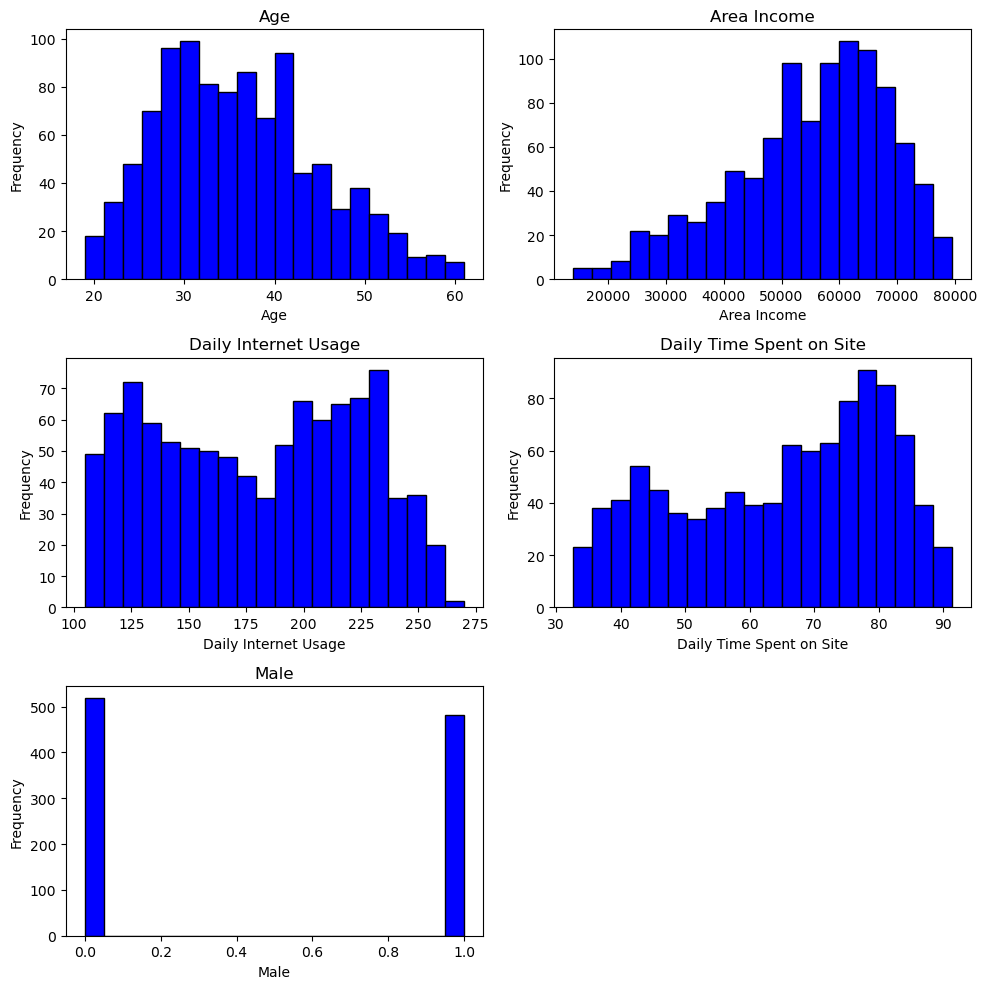

In [16]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#load
train_df = pd.read_csv('trainsetn.csv')
train_df.drop(['City', 'Country', 'Timestamp', 'Ad Topic Line'], axis=1, inplace=True)


X_train = train_df[['Age', 'Area Income', 'Daily Internet Usage']]
y_train = train_df['Clicked on Ad']

#switched to forest regression 
rf_model = RandomForestClassifier(random_state=42)


rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Accuracy:", rf_cv_scores.mean())

#train
rf_model.fit(X_train, y_train)

#prediction
y_train_pred = rf_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

print("Training Set Results:")
print(f"Training Accuracy: {train_accuracy}")
print("Training Classification Report:")
print(train_report)
print("\n")

#used similar function as of linear regression
def fun_test(test_path):
    
    test_df = pd.read_csv(test_path)
    
    X_test = test_df[['Age', 'Area Income', 'Daily Internet Usage']]
    y_test = test_df['Clicked on Ad']
    
    y_test_pred = rf_model.predict(X_test)
    
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred)
    
    print(f"Results for {test_path}:")
    print(f"Test Accuracy: {test_accuracy}")
    print("Test Classification Report:")
    print(test_report)
    print("\n")


fun_test('synthetic_data_100.csv')
fun_test('synthetic_data_200.csv')
fun_test('synthetic_data_500.csv')

import pandas as pd
import matplotlib.pyplot as plt



columns_to_plot = ['Age', 'Area Income', 'Daily Internet Usage', 'Daily Time Spent on Site', 'Male']

plt.figure(figsize=(10, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns, position i
    plt.hist(train_df[column], bins=20, color='blue', edgecolor='black')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

